## Throughout the exercises for Regression in Python lessons, you will use the following example scenario: 
## As a customer analyst, I want to know who has spent the most money with us over their lifetime. I have monthly charges and tenure, so I think I will be able to use those two attributes as features to estimate total_charges. I need to do this within an average of $5.00 per customer.

## The first step will be to acquire and prep the data. Do your work for this exercise in a file named wrangle.py.



In [30]:
# import modules
import acquire
import prepare
import wrangle

# import python libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 1. Acquire customer_id, monthly_charges, tenure, and total_charges from telco_churn database for all customers with a 2 year contract.

In [2]:
df = acquire.get_telco_data()
df.head()

,customer_id,monthly_charges,total_charges,tenure
0,0013-SMEOE,109.70,7904.25,71
1,0014-BMAQU,84.65,5377.8,63
2,0016-QLJIS,90.45,5957.9,65
3,0017-DINOC,45.20,2460.55,54
4,0017-IUDMW,116.80,8456.75,72


### 2. Walk through the steps above using your new dataframe. You may handle the missing values however you feel is appropriate.


In [3]:
df.shape

(1695, 4)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1695 entries, 0 to 1694
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   customer_id      1695 non-null   object 
 1   monthly_charges  1695 non-null   float64
 2   total_charges    1695 non-null   object 
 3   tenure           1695 non-null   int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 53.1+ KB


In [4]:
print(df.isnull().sum())

customer_id        0
monthly_charges    0
total_charges      0
tenure             0
dtype: int64


In [5]:
print(df.columns[df.isnull().any()])

Index([], dtype='object')


In [11]:
df.total_charges.value_counts().head()

           10
7334.05     2
1161.75     2
1110.05     2
5682.25     2
Name: total_charges, dtype: int64

In [13]:
#fill in missing numbers
df = df.fillna(0)

In [15]:
#replace total_charges missing values and convert to float
df.total_charges = df.total_charges.str.replace(' ', '0').astype(float)

In [16]:
df.describe()

,monthly_charges,total_charges,tenure
count,1695.000000,1695.000000,1695.000000
mean,60.770413,3706.934336,56.735103
std,34.678865,2579.517834,18.209363
min,18.400000,0.000000,0.000000
25%,24.025000,1269.675000,48.000000
50%,64.350000,3593.800000,64.000000
75%,90.450000,5988.800000,71.000000
max,118.750000,8672.450000,72.000000


In [17]:
df.total_charges.value_counts().head()

0.00       10
1110.05     2
5714.20     2
1161.75     2
343.45      2
Name: total_charges, dtype: int64

In [18]:
df.dtypes

customer_id         object
monthly_charges    float64
total_charges      float64
tenure               int64
dtype: object

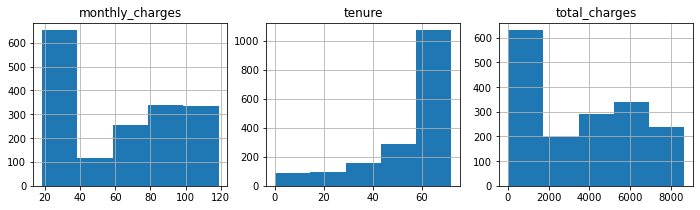

In [19]:
#loop through each of the numeric columns of interest
#show the distribution of each on a separate subplot.
plt.figure(figsize=(16, 3))

for i, col in enumerate(['monthly_charges', 'tenure', 'total_charges']):  
    plot_number = i + 1 # i starts at 0, but plot nos should start at 1
    series = df[col]  
    plt.subplot(1,4, plot_number)
    plt.title(col)
    series.hist(bins=5)

<AxesSubplot:>

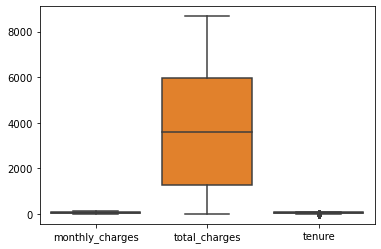

In [20]:
#seaborn.boxplot defaults to plotting all the numeric variables 
#if specific x and y values are not specified.

plt.figure(figsize=(6, 4))
sns.boxplot(data=df)

In [24]:
#test prepare.py by starting from scratch
df = acquire.get_telco_data()

In [25]:
#run prepare
df = prepare.clean_telco(df)
df.head()

,customer_id,monthly_charges,total_charges,tenure
0,0013-SMEOE,109.70,7904.25,71
1,0014-BMAQU,84.65,5377.80,63
2,0016-QLJIS,90.45,5957.90,65
3,0017-DINOC,45.20,2460.55,54
4,0017-IUDMW,116.80,8456.75,72


In [26]:
df.dtypes

customer_id         object
monthly_charges    float64
total_charges      float64
tenure               int64
dtype: object

### 3. End with a python file wrangle.py that contains the function, wrangle_telco(), that will acquire the data and return a dataframe cleaned with no missing values.

In [33]:
# combining acquire, prepare into one module wrangle
df = wrangle.wrangle_telco()

df.head()

,customer_id,monthly_charges,total_charges,tenure
0,0013-SMEOE,109.70,7904.25,71
1,0014-BMAQU,84.65,5377.80,63
2,0016-QLJIS,90.45,5957.90,65
3,0017-DINOC,45.20,2460.55,54
4,0017-IUDMW,116.80,8456.75,72
